From what I could deduce from the narrative of the data set, the aim of the data set is to know the impact of generating plant on the climate change due to the usage of fuel to generate electricity over the years. From this summary i could make the conclusion that the following features should be explored:
1. To explore the operating cost of each power plant
2. To see and show how fuel costs impact viability of different generation sources (fuel types)
3. To highlight the competetiveness of renewable electricity
4. To show how general mix of different utilities evolved over time (i.e. over the years)


1. How do I calculate the Operating Costs of each power plant from the given features/columns
2. How will I be able to highlight the competetiveness of renewable electricity as no renewable source of electricity was given in the data set
3. What is the usefulness of the Utility ID
4. Is fuel costs the same as the operating cost of the various plants?

So please anyone that can help should please tag me so that i can easily see the solutions u proffer and if i'm not asking the right questions please someone should let me know

Now, for every point you made, I will talk about it in the same numbering:

    I don't know much about the plant they are talking about. Could it be that these plants produce the fuel or they consume the fuel to produce another product. What do you think about it? I think they are plants that consume fuel to produce something else and the type of fuel they consume to produce their products.
    I don't really understand what you mean here - "How will I be able to highlight the competitiveness of renewable electricity as no renewable sources of electricity as no renewable sources of electricity was given in the dataset"
    I think utility ID is as good as the record_id, it can't be used to predictive anything. It's plain nominal. We might be able to use it to infer though like to see how often a plant gets assigned an utility_id and maybe then create a different dataframe with a new variable called "number of utility_id" to order plants with more utility_id over ones with lesser. With this and the type of fuel each plants uses, we can know the "kind of plants", "individual plants" and even "type of fuel" that affects the environment.
    Fuel cost could be same as operating cost for each plant but could that be the only cost in their operations considering what I think about the data.



## 1. Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read in data via url link provided

In [109]:
fuel_data = pd.read_csv("https://bit.ly/HDSC-StageOneDataset", error_bad_lines=False)

In [112]:
# Write to disk for further use
fuel_data.to_csv("fuel_quality.csv", index=False)

## 3. Examination of data

#### (a) Dataset Description
The data provided in this Github link <b><u>is the fuel quality data</u></b> from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:<br>
* **Record_id** : record id
* **Utility_id_ferc1**: Utility id assigned by the FERC
* **Report_year**: year of report
* **Plant_name_ferc1**: the name of the plant
* **Fuel_type_code_pudl**: the type of fuel
* **Fuel_unit**: the unit of fuel
* **Fuel_qty_burned**: the quantity of fuel burned
* **Fuel_mmbtu_per_unit**: the measure of energy per unit
* **fuel_cost_per_unit_burned**: the fuel cost per unit burned
* **Fuel_cost_per_unit_delivered**: the cost of fuel delivered per unit
* **fuel_cost_per_mmbtu**: the cost of fuel per mmbtu


In [105]:
fuel_quality.head()

record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130                      39.72   
3               23.950                      47.21   
4                1.000                       2.77   

   fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
0                         18.53                1.121  
1                         18.53                1.120  
2                         38.12                1.650  
3                         45.99                1.970  
4                          2.77                2.570

#### (b) Check for completeness

In [113]:
fuel_data.shape

(29523, 11)

In [116]:
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

#### (c) Check for quality of data

In [218]:
#### See details in section for Data Types

In [172]:
# Unique records, Missing data
for column in fuel_data.columns:
    input_ = fuel_data[column].unique()
    if (fuel_data[column].dtype == np.object) and (input_.size <= 10):
        print("{:<32s}".format(column), input_)
#         print("test".rjust(37), '\n')
    else:
        input_ = str(input_.size) + " unique records"
        print("{:<32s}".format(column), input_)
    print("{:>32s}".format(' '),fuel_data[column].isnull().sum(), "missing data")
    print('-'*60)

record_id                        29523 unique records
                                 0 missing data
------------------------------------------------------------
utility_id_ferc1                 185 unique records
                                 0 missing data
------------------------------------------------------------
report_year                      25 unique records
                                 0 missing data
------------------------------------------------------------
plant_name_ferc1                 2315 unique records
                                 0 missing data
------------------------------------------------------------
fuel_type_code_pudl              ['coal' 'gas' 'nuclear' 'oil' 'waste' 'other']
                                 0 missing data
------------------------------------------------------------
fuel_unit                        ['ton' 'mcf' 'kgU' 'bbl' 'gramsU' nan 'mwdth' 'mmbtu' 'mwhth' 'gal']
                                 180 missing data
-------------

In [156]:
fuel_data.report_year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [171]:
print("There are", fuel_data.duplicated().sum(), "duplicated records")

There are 0 duplicated records


## 4. Data types

The data provided in this Github link <b><u>is the fuel quality data</u></b> from the Federal Energy Regulatory Commission 
* **Record_id** : record id
* **Utility_id_ferc1**: Utility id assigned by the FERC
* **Report_year**: year of report
* **Plant_name_ferc1**: the name of the plant
* **Fuel_type_code_pudl**: the type of fuel
* **Fuel_unit**: the unit of fuel
* **Fuel_qty_burned**: the quantity of fuel burned
* **Fuel_mmbtu_per_unit**: the measure of energy per unit
* **fuel_cost_per_unit_burned**: the fuel cost per unit burned
* **Fuel_cost_per_unit_delivered**: the cost of fuel delivered per unit
* **fuel_cost_per_mmbtu**: the cost of fuel per mmbtu


In [220]:
def range_category(column):
    input_ = fuel_data[column]
    if input_.dtype == np.object:
        if input_.unique().size <=10:
            output = ','.join(map(str, input_.unique()))
        else:
            output = f"{input_.unique().size:,} unique records"
        return output
    
    else:
        min_ = fuel_data[column].min()
        max_ = fuel_data[column].max()
        range_ = max_ - min_
        output = f"{min_:,.1f} -- {max_:,.1f} ({range_:,.1f})"
        return output
    
data_class = [
    'Categorical_Norminal',
    'Categorical_Norminal',
    'Numerical_interval scale',
    'Categorical_Norminal',
    'Categorical_Norminal',
    'Categorical_Norminal',
    'Numerical_ratio scale',
    'Numerical_ratio scale',
    'Numerical_ratio scale',
    'Numerical_ratio scale',
    'Numerical_ratio scale'
]

description = [
    'record id',
    'Utility id assigned by the FERC',
    'year of report',
    'the name of the plant',
    'the type of fuel',
    'the unit of fuel',
    'the quantity of fuel burned',
    'the measure of energy per unit',
    'the fuel cost per unit burned',
    'the cost of fuel delivered per unit',
    'the cost of fuel per mmbtu'
]

In [222]:
data_types = fuel_data.dtypes.to_frame().rename(columns={0:"Data type"})
data_types['Data class'] = data_class
data_types['description'] = description
data_types['range/categories'] = [range_category(column) for column in fuel_data.columns]
data_types['missing_data'] = [fuel_data[column].isnull().sum() for column in fuel_data.columns]
data_types

Data type                Data class  \
record_id                       object      Categorical_Norminal   
utility_id_ferc1                 int64      Categorical_Norminal   
report_year                      int64  Numerical_interval scale   
plant_name_ferc1                object      Categorical_Norminal   
fuel_type_code_pudl             object      Categorical_Norminal   
fuel_unit                       object      Categorical_Norminal   
fuel_qty_burned                float64     Numerical_ratio scale   
fuel_mmbtu_per_unit            float64     Numerical_ratio scale   
fuel_cost_per_unit_burned      float64     Numerical_ratio scale   
fuel_cost_per_unit_delivered   float64     Numerical_ratio scale   
fuel_cost_per_mmbtu            float64     Numerical_ratio scale   

                                                      description  \
record_id                                               record id   
utility_id_ferc1                  Utility id assigned by the FERC   
report_year                                        year of report   
plant_name_ferc1                            the name of the plant   
fuel_type_code_pudl                              the type of fuel   
fuel_unit                                        the unit of fuel   
fuel_qty_burned                       the quantity of fuel burned   
fuel_mmbtu_per_unit                the measure of energy per unit   
fuel_cost_per_unit_burned           the fuel cost per unit burned   
fuel_cost_per_unit_delivered  the cost of fuel delivered per unit   
fuel_cost_per_mmbtu                    the cost of fuel per mmbtu   

                                                              range/categories  \
record_id                                                29,523 unique records   
utility_id_ferc1                                          1.0 -- 514.0 (513.0)   
report_year                                          1,994.0 -- 2,018.0 (24.0)   
plant_name_ferc1                                          2,315 unique records   
fuel_type_code_pudl                           coal,gas,nuclear,oil,waste,other   
fuel_unit                     ton,mcf,kgU,bbl,gramsU,nan,mwdth,mmbtu,mwhth,gal   
fuel_qty_burned                           1.0 -- 555,894,250.0 (555,894,249.0)   
fuel_mmbtu_per_unit                                       0.0 -- 341.3 (341.3)   
fuel_cost_per_unit_burned                      -276.1 -- 139,358.0 (139,634.1)   
fuel_cost_per_unit_delivered               -874.9 -- 7,964,521.0 (7,965,395.9)   
fuel_cost_per_mmbtu                             -41.5 -- 359,278.0 (359,319.5)   

                              missing_data  
record_id                                0  
utility_id_ferc1                         0  
report_year                              0  
plant_name_ferc1                         0  
fuel_type_code_pudl                      0  
fuel_unit                              180  
fuel_qty_burned                          0  
fuel_mmbtu_per_unit                      0  
fuel_cost_per_unit_burned                0  
fuel_cost_per_unit_delivered             0  
fuel_cost_per_mmbtu                      0

## 5. Transform: for Quality

<pre><u>Issues affecting quality of data</u>:
    1. 180 missing values in <b>fuel_unit</b>
    2. <u>Negative values</u> in <b>fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered, and 
        fuel_cost_per_mmbtu</b>
<pre>

In [228]:
fuel_data.describe(include=np.object)

record_id plant_name_ferc1 fuel_type_code_pudl fuel_unit
count                     29523            29523               29523     29343
unique                    29523             2315                   6         9
top     f1_fuel_1996_12_194_2_7        big stone                 gas       mcf
freq                          1              156               11486     11354

In [231]:
# Replace missing values with most common unit 'mcf'
fuel_data.fuel_unit.fillna('mcf', inplace=True)
fuel_data.fuel_unit.isnull().any()

False

In [232]:
# At the moment, not sure what to do about these negative values, so just display and revisit later
fuel_data[['fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered',
           'fuel_cost_per_mmbtu']][fuel_data.fuel_cost_per_mmbtu < 0]

fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
434                      -35.100                       -35.380   
516                      -57.450                       -58.800   
518                      -57.490                       -58.800   
520                      -57.470                       -58.800   
2117                     -53.630                       -53.560   
2119                     -53.630                       -53.560   
2121                     -53.630                       -53.560   
2123                     -85.760                       -85.640   
2125                     -85.750                       -85.640   
2334                     -42.679                       -42.290   
2782                     -41.501                       -41.501   
3102                     -45.130                       -44.050   
3105                     -45.130                       -44.050   
3108                     -45.130                       -44.050   
3927                     -38.966                       -38.972   
4239                      -7.390                         6.670   
4253                      -7.700                        -7.430   
4255                      -7.700                        -7.430   
4257                      -7.700                        -7.430   
4963                     -43.712                       -43.747   
6031                     -33.014                       -32.970   
7263                     -40.536                       -17.008   
7730                    -123.310                      -174.670   
7733                    -276.080                      -174.670   
7736                    -174.670                      -174.670   
9152                     -37.809                       -37.790   
9829                      -7.503                        -7.503   
10257                    -39.675                       -40.195   
10317                    -59.680                       -60.290   
11242                   -119.040                      -118.340   
11888                    -34.858                       -34.846   
13052                    -30.032                       -30.035   
13201                     -0.448                        -0.448   
14289                    -31.501                       -31.501   
15558                    -24.295                       -24.295   
16176                     -3.810                        -3.810   
17419                     -3.330                        -3.330   
21081                    -70.884                         0.000   
26841                     -3.946                        -3.946   

       fuel_cost_per_mmbtu  
434                 -3.003  
516                 -2.000  
518                 -1.959  
520                 -1.980  
2117                -1.996  
2119                -1.996  
2121                -1.996  
2123                -3.186  
2125                -3.195  
2334                -3.532  
2782               -41.501  
3102                -1.602  
3105                -1.670  
3108                -1.638  
3927                -3.255  
4239                -0.274  
4253                -0.333  
4255                -0.236  
4257                -0.280  
4963                -3.781  
6031                -2.851  
7263                -3.431  
7730                -3.978  
7733                -8.906  
7736                -5.635  
9152                -3.312  
9829                -0.520  
10257               -3.541  
10317               -3.100  
11242               -5.750  
11888               -2.641  
13052               -2.484  
13201               -0.033  
14289               -2.609  
15558               -2.076  
16176               -0.350  
17419               -0.280  
21081               -5.273  
26841               -0.416

## 6. Transform: for Analysis

<pre>
    The values of these variables (or features) 
    [<b>fuel_qty_burned,
    fuel_mmbtu_per_unit,
    fuel_cost_per_unit_burned,
    fuel_cost_per_unit_delivered</b>],
    are not of the same unit of measurement.
    The different units are enumerated in the <b>fuel_unit</b> variable
    
    <u>So lets create new variables adjusting for uniformity of units</u></pre>

In [252]:
new_variables = ['n_fuel_energy_mmbtu',   # Energy produced in from fuel in mmbtu (1million British Thermal Unit)
                 'n_fuel_cost_burned',    # Cost of burning fuel
                 'n_fuel_cost_delivered'  # Cost of delivering the fuel
                ]
for column, variable in zip(fuel_data.columns[7:-1], new_variables):
    fuel_data[variable] = fuel_data.fuel_qty_burned * fuel_data[column]
    
fuel_data.head()

record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130                      39.72   
3               23.950                      47.21   
4                1.000                       2.77   

   fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  n_fuel_energy_mmbtu  \
0                         18.53                1.121         8.921254e+07   
1                         18.53                1.120         1.739994e+08   
2                         38.12                1.650         7.187562e+07   
3                         45.99                1.970         8.956064e+07   
4                          2.77                2.570         4.053300e+04   

   n_fuel_cost_burned  n_fuel_cost_delivered  
0        9.996752e+07           9.964487e+07  
1        1.948474e+08           1.943231e+08  
2        1.183133e+08           1.135474e+08  
3        1.765410e+08           1.719789e+08  
4        1.122764e+05           1.122764e+05

In [257]:
fuel_data.iloc[-200:]

record_id  utility_id_ferc1  report_year  \
29323   f1_fuel_2018_12_79_2_11                79         2018   
29324   f1_fuel_2018_12_182_0_1               182         2018   
29325   f1_fuel_2018_12_182_0_4               182         2018   
29326   f1_fuel_2018_12_182_0_7               182         2018   
29327   f1_fuel_2018_12_182_0_8               182         2018   
29328  f1_fuel_2018_12_182_0_10               182         2018   
29329  f1_fuel_2018_12_182_0_13               182         2018   
29330  f1_fuel_2018_12_182_0_14               182         2018   
29331   f1_fuel_2018_12_182_1_1               182         2018   
29332   f1_fuel_2018_12_182_1_4               182         2018   
29333   f1_fuel_2018_12_182_1_7               182         2018   
29334   f1_fuel_2018_12_182_1_9               182         2018   
29335  f1_fuel_2018_12_182_1_11               182         2018   
29336  f1_fuel_2018_12_182_1_13               182         2018   
29337  f1_fuel_2018_12_182_1_14               182         2018   
29338   f1_fuel_2018_12_182_2_1               182         2018   
29339   f1_fuel_2018_12_182_2_2               182         2018   
29340   f1_fuel_2018_12_128_0_1               128         2018   
29341   f1_fuel_2018_12_128_0_2               128         2018   
29342    f1_fuel_2018_12_72_0_1                72         2018   
29343   f1_fuel_2018_12_276_0_1               276         2018   
29344   f1_fuel_2018_12_108_0_1               108         2018   
29345   f1_fuel_2018_12_108_0_4               108         2018   
29346  f1_fuel_2018_12_108_0_10               108         2018   
29347  f1_fuel_2018_12_108_0_11               108         2018   
29348  f1_fuel_2018_12_108_0_13               108         2018   
29349   f1_fuel_2018_12_108_1_1               108         2018   
29350   f1_fuel_2018_12_108_1_4               108         2018   
29351   f1_fuel_2018_12_108_1_7               108         2018   
29352  f1_fuel_2018_12_108_1_13               108         2018   
...                         ...               ...          ...   
29493   f1_fuel_2018_12_191_0_3               191         2018   
29494   f1_fuel_2018_12_191_0_5               191         2018   
29495   f1_fuel_2018_12_191_0_6               191         2018   
29496   f1_fuel_2018_12_191_0_8               191         2018   
29497  f1_fuel_2018_12_191_0_11               191         2018   
29498   f1_fuel_2018_12_191_1_2               191         2018   
29499   f1_fuel_2018_12_191_1_3               191         2018   
29500   f1_fuel_2018_12_191_1_6               191         2018   
29501   f1_fuel_2018_12_191_1_8               191         2018   
29502   f1_fuel_2018_12_191_1_9               191         2018   
29503  f1_fuel_2018_12_191_1_14               191         2018   
29504  f1_fuel_2018_12_191_1_15               191         2018   
29505   f1_fuel_2018_12_432_0_2               432         2018   
29506   f1_fuel_2018_12_432_0_5               432         2018   
29507   f1_fuel_2018_12_432_0_8               432         2018   
29508  f1_fuel_2018_12_432_0_11               432         2018   
29509  f1_fuel_2018_12_432_0_14               432         2018   
29510   f1_fuel_2018_12_403_0_2               403         2018   
29511   f1_fuel_2018_12_403_0_6               403         2018   
29512   f1_fuel_2018_12_403_0_9               403         2018   
29513    f1_fuel_2018_12_12_0_2                12         2018   
29514    f1_fuel_2018_12_12_0_4                12         2018   
29515    f1_fuel_2018_12_12_0_7                12         2018   
29516    f1_fuel_2018_12_12_0_8                12         2018   
29517   f1_fuel_2018_12_12_0_10                12         2018   
29518   f1_fuel_2018_12_12_0_13                12         2018   
29519    f1_fuel_2018_12_12_1_1                12         2018   
29520   f1_fuel_2018_12_12_1_10                12         2018   
29521   f1_fuel_2018_12_12_1_13                12         2018

In [219]:
# Descriptive stats of numerical features
fuel_data.describe()

utility_id_ferc1   report_year  fuel_qty_burned  fuel_mmbtu_per_unit  \
count      29523.000000  29523.000000     2.952300e+04         29523.000000   
mean         118.601836   2005.806050     2.622119e+06             8.492111   
std           74.178353      7.025483     9.118004e+06            10.600220   
min            1.000000   1994.000000     1.000000e+00             0.000001   
25%           55.000000   2000.000000     1.381700e+04             1.024000   
50%          122.000000   2006.000000     2.533220e+05             5.762694   
75%          176.000000   2012.000000     1.424034e+06            17.006000   
max          514.000000   2018.000000     5.558942e+08           341.260000   

       fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
count               29523.000000                  2.952300e+04   
mean                  208.649031                  9.175704e+02   
std                  2854.490090                  6.877593e+04   
min                  -276.080000                 -8.749370e+02   
25%                     5.207000                  3.778500e+00   
50%                    26.000000                  1.737100e+01   
75%                    47.113000                  4.213700e+01   
max                139358.000000                  7.964521e+06   

       fuel_cost_per_mmbtu  
count         29523.000000  
mean             19.304354  
std            2091.540939  
min             -41.501000  
25%               1.940000  
50%               4.127000  
75%               7.745000  
max          359278.000000

In [8]:
# Descriptive stats of non-numerical features
fuel_quality.describe(include=np.object)

record_id plant_name_ferc1 fuel_type_code_pudl fuel_unit
count                     29523            29523               29523     29343
unique                    29523             2315                   6         9
top     f1_fuel_1996_12_194_2_7        big stone                 gas       mcf
freq                          1              156               11486     11354

In [9]:
# There are 6 categories of fuel types
print(fuel_quality.fuel_type_code_pudl.unique())

['coal' 'gas' 'nuclear' 'oil' 'waste' 'other']


In [11]:
fuel_quality.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [12]:
fuel_quality.fuel_unit = fuel_quality.fuel_unit.fillna(value='mcf')

In [13]:
fuel_quality.isnull().values.any()

False

In [14]:
fuel_quality.groupby('fuel_type_code_pudl').first()

record_id  utility_id_ferc1  report_year  \
fuel_type_code_pudl                                                          
coal                  f1_fuel_1994_12_1_0_7                 1         1994   
gas                  f1_fuel_1994_12_2_0_10                 2         1994   
nuclear               f1_fuel_1994_12_2_1_1                 2         1994   
oil                   f1_fuel_1994_12_6_0_2                 6         1994   
other                f1_fuel_1994_12_11_0_6                11         1994   
waste                 f1_fuel_1994_12_9_0_3                 9         1994   

                     plant_name_ferc1 fuel_unit  fuel_qty_burned  \
fuel_type_code_pudl                                                
coal                         rockport       ton        5377489.0   
gas                         chickasaw       mcf          40533.0   
nuclear              joseph m. farley       kgU           2260.0   
oil                      clinch river       bbl           6510.0   
other                      w.f. wyman       bbl          55652.0   
waste                    b.l. england       ton           2438.0   

                     fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
fuel_type_code_pudl                                                   
coal                           16.590000                     18.590   
gas                             1.000000                      2.770   
nuclear                         0.064094                     28.770   
oil                             5.875338                     32.130   
other                           0.149719                     14.685   
waste                           0.015939                     34.180   

                     fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
fuel_type_code_pudl                                                     
coal                                       18.530                1.121  
gas                                         2.770                2.570  
nuclear                                     0.000                0.450  
oil                                        23.444                5.469  
other                                      15.090                2.335  
waste                                      34.180                1.072

In [15]:
fuel_quality.duplicated().any()

False

In [258]:
fuel_units = fuel_data.fuel_unit.value_counts().reset_index().rename(columns={'index':'fuel_label'})
fuel_units

fuel_label  fuel_unit
0        mcf      11534
1        ton       8958
2        bbl       7998
3     gramsU        464
4      mmbtu        180
5        kgU        110
6      mwhth        100
7      mwdth         95
8        gal         84

In [59]:
plt.grid?

/usr/lib/python3/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


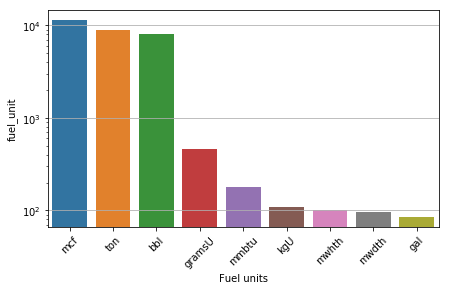

In [259]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=45)
sns.barplot(data=fuel_units, x='fuel_label', y='fuel_unit')
plt.yscale('log')
plt.grid(b=True, axis='y')
plt.xlabel('Fuel units');

In [73]:
g.set_ylim?

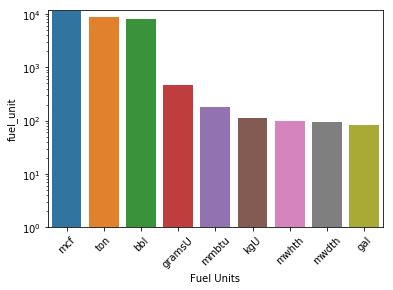

In [77]:
g = sns.barplot(data=fuel_units, x='fuel_label', y='fuel_unit')
g.set_yscale('log')
g.set_ylim(1, 12000)
plt.xticks(rotation=45)
plt.xlabel('Fuel Units');

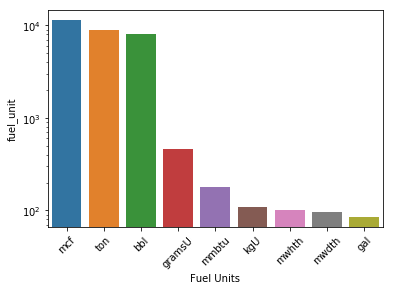

In [78]:
g = sns.barplot(data=fuel_units, x='fuel_label', y='fuel_unit')
g.set_yscale('log')
# g.set_ylim(1, 12000)
plt.xticks(rotation=45)
plt.xlabel('Fuel Units');

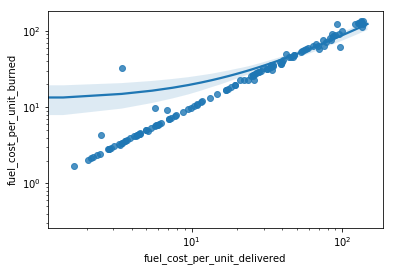

In [102]:
sns.regplot(x=fuel_quality.sample(frac=0.005, random_state=4).fuel_cost_per_unit_delivered,
            y=fuel_quality.sample(frac=0.005, random_state=4).fuel_cost_per_unit_burned
           )
plt.yscale('log')
plt.xscale('log')

In [103]:
sns.FacetGrid?